# Author : Sumon Singh

## Company :

### The Spark Foundation


## Job-Role :


### Data Science And Business Analyst¶


## job-Type :


### Internship

## Task 6 :

### Prediction using Decision Tree Algorithm

## **Create the Decision Tree classifier and visualize it graphically


## **The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly


## **Dataset : https://bit.ly/3kXTdox¶

### Import Libraries

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from jupyterthemes import jtplot
print('Setup Completed')

Setup Completed


### Load Dataset

In [124]:
df=pd.read_csv('Iris.csv')

### Walkthrough The Dataset

In [125]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [126]:
df.drop('Id',axis=1,inplace=True)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [128]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [129]:
df.shape

(150, 5)

In [130]:
df.size

750

In [131]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [132]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

### Visualize The Dataset

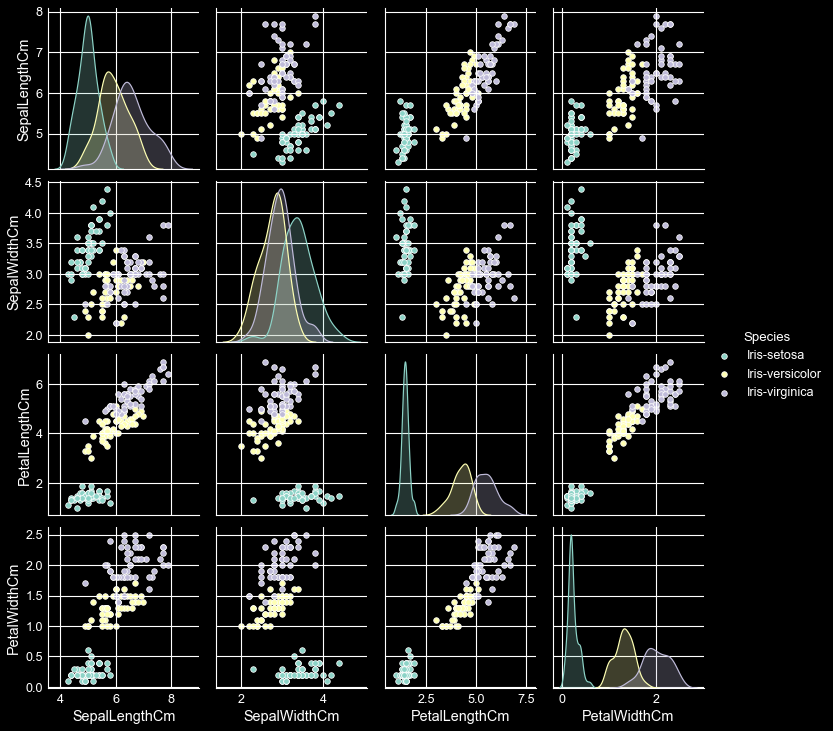

In [133]:
plt.style.use('dark_background')
sns.pairplot(df,hue='Species')

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Frequency'>

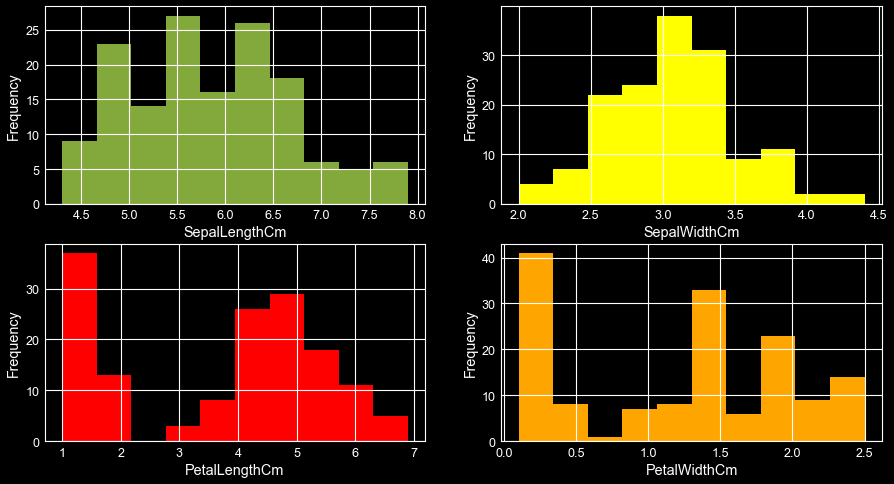

In [134]:
jtplot.style()
plt.style.use('dark_background')
fig=plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.xlabel('SepalLengthCm')
df['SepalLengthCm'].plot(kind='hist',color='g')
plt.subplot(2,2,2)
plt.xlabel('SepalWidthCm')
df['SepalWidthCm'].plot(kind='hist',color='yellow')
plt.subplot(2,2,3)
plt.xlabel('PetalLengthCm')
df['PetalLengthCm'].plot(kind='hist',color='red')
plt.subplot(2,2,4)
plt.xlabel('PetalWidthCm')
df['PetalWidthCm'].plot(kind='hist',color='orange')

<AxesSubplot:>

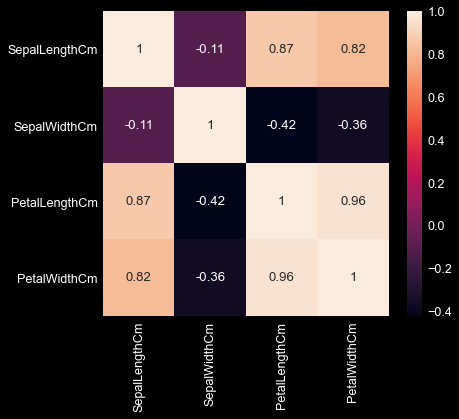

In [135]:
jtplot.style()
plt.style.use('dark_background')
sns.heatmap(df.corr(),annot=True)

## Machine Learning

### Import Required Libraries

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

### Organize Data For Creating The Model

In [137]:
X=df[['SepalLengthCm'	,'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [138]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
y=l.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Split Dataset Into Training And Testing Set

In [139]:
input_train,input_test,output_train,output_test=train_test_split(X,y,train_size=0.7,random_state=1)

### Create The Model And Fit Training Dataset

In [140]:
dt=DecisionTreeClassifier(random_state=0)
dt=dt.fit(input_train,output_train)

### Predict The Output For Testing Dataset

In [141]:
y_Predict=dt.predict(input_test)
y_Predict

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

### Evalute The Accuracy Of The Model

In [142]:
print('Accuracy of the model is :',accuracy_score(y_Predict,output_test))

Accuracy of the model is : 0.9555555555555556


In [143]:
df_traget=pd.DataFrame({'Actual':output_test,'Predicted':y_Predict})
df_traget

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


### Visualize The Decision Tree

In [144]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [145]:
import matplotlib

[Text(334.8, 489.24, 'PetalWidthCm <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]\nclass = Iris-virginica'),
 Text(251.10000000000002, 380.52000000000004, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = Iris-setosa'),
 Text(418.5, 380.52000000000004, 'PetalWidthCm <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]\nclass = Iris-virginica'),
 Text(167.4, 271.8, 'PetalLengthCm <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = Iris-versicolor'),
 Text(83.7, 163.08000000000004, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Iris-versicolor'),
 Text(251.10000000000002, 163.08000000000004, 'SepalLengthCm <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(167.4, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(669.6, 271.8, 'PetalLengthCm <= 4.85\ngini = 0.056\n

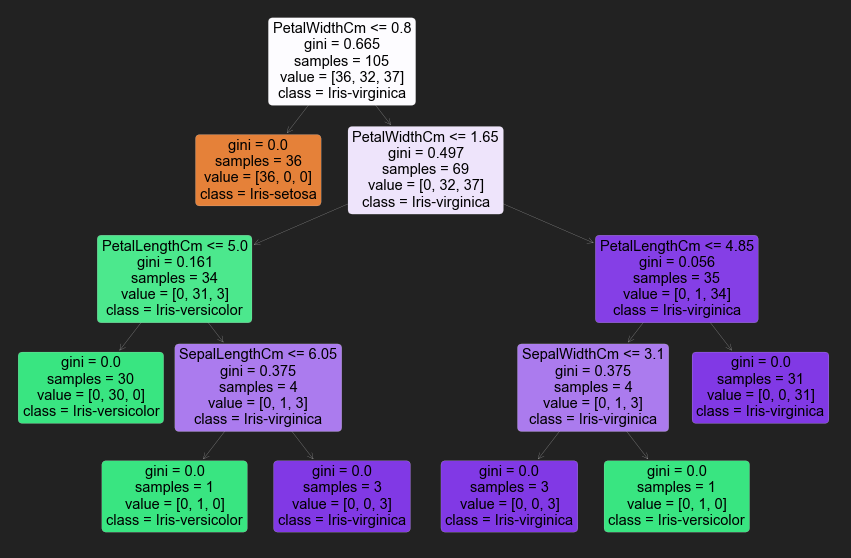

In [146]:
plt.style.use('dark_background')
matplotlib.rcParams['text.color'] = 'black'
fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(dt,filled=True,rounded=True,
               feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
               class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])